In [1]:
#Loading the data

import os
import pandas as pd

df= pd.read_csv('train.csv')
print(df.head)

<bound method NDFrame.head of               id target  day month  duration  contactId  age  gender  \
0      432148809     no   27   may       166        623   30  female   
1      432184318     no   26   oct       183       1992   42  female   
2      432182482     no    5   jun       227       2778   26  female   
3      432150520     no    2   jun        31       3070   34    male   
4      432145870     no   15   may      1231       6583   48    male   
...          ...    ...  ...   ...       ...        ...  ...     ...   
31475  432184725    yes   30   nov      1628   69542367   58  female   
31476  432147139     no   21   may       173   69542565   40  female   
31477  432166958     no   17   nov       422   69543453   51  female   
31478  432166312     no   29   aug        69   69544121   30    male   
31479  432171709     no    2   feb       171   69546604   50    male   

              job maritalStatus        education creditFailure  \
0          worker       married       h

In [2]:
# getting the columns of the dataset
columns = list(df.columns)
columns

['id',
 'target',
 'day',
 'month',
 'duration',
 'contactId',
 'age',
 'gender',
 'job',
 'maritalStatus',
 'education',
 'creditFailure',
 'accountBalance',
 'house',
 'credit',
 'contactType',
 'numberOfContacts',
 'daySinceLastCampaign',
 'numberOfContactsLastCampaign',
 'lastCampaignResult']

In [3]:
# examining missing values
print("Missing values distribution: ")
print(df.isnull().mean())
print("")

Missing values distribution: 
id                              0.000000
target                          0.000000
day                             0.000000
month                           0.000000
duration                        0.000000
contactId                       0.000000
age                             0.000000
gender                          0.000000
job                             0.000000
maritalStatus                   0.000000
education                       0.000000
creditFailure                   0.000000
accountBalance                  0.000000
house                           0.000000
credit                          0.000000
contactType                     0.000000
numberOfContacts                0.000000
daySinceLastCampaign            0.817726
numberOfContactsLastCampaign    0.000000
lastCampaignResult              0.000000
dtype: float64



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31480 non-null  int64  
 1   target                        31480 non-null  object 
 2   day                           31480 non-null  int64  
 3   month                         31480 non-null  object 
 4   duration                      31480 non-null  int64  
 5   contactId                     31480 non-null  int64  
 6   age                           31480 non-null  int64  
 7   gender                        31480 non-null  object 
 8   job                           31480 non-null  object 
 9   maritalStatus                 31480 non-null  object 
 10  education                     31480 non-null  object 
 11  creditFailure                 31480 non-null  object 
 12  accountBalance                31480 non-null  int64  
 13  h

"daySinceLastCampaign" has a ton of null values. Because these null values equal that these contacts have not previously been contacted, I will put a -1 in its place to remove these null values.

In [7]:
df['daySinceLastCampaign'].fillna(-1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31480 non-null  int64  
 1   target                        31480 non-null  object 
 2   day                           31480 non-null  int64  
 3   month                         31480 non-null  object 
 4   duration                      31480 non-null  int64  
 5   contactId                     31480 non-null  int64  
 6   age                           31480 non-null  int64  
 7   gender                        31480 non-null  object 
 8   job                           31480 non-null  object 
 9   maritalStatus                 31480 non-null  object 
 10  education                     31480 non-null  object 
 11  creditFailure                 31480 non-null  object 
 12  accountBalance                31480 non-null  int64  
 13  h

Now all the columns are filled in. I will explore the dataset to see if there is any more cleaning that needs to be done.

In [9]:
df['lastCampaignResult'].value_counts()

unknown    25746
failure     3403
other       1294
success     1037
Name: lastCampaignResult, dtype: int64

In [23]:
df['numberOfContactsLastCampaign'].value_counts()

0      25742
1       1912
2       1466
3        796
4        502
5        324
6        200
7        139
8         86
9         65
11        48
10        39
12        30
13        24
14        14
17        13
15        13
19        11
16         7
20         6
23         6
18         5
27         4
21         3
29         3
25         3
24         3
30         3
22         2
38         2
37         2
40         1
51         1
32         1
275        1
55         1
41         1
35         1
Name: numberOfContactsLastCampaign, dtype: int64

In [24]:
df['target'].value_counts()

no     27780
yes     3700
Name: target, dtype: int64

In [25]:
df['contactType'].value_counts()

cellPhone    20353
unknown       9079
landline      2048
Name: contactType, dtype: int64

In [26]:
df.describe()

,id,day,duration,contactId,age,accountBalance,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign
count,3.148000e+04,31480.000000,31480.000000,3.148000e+04,31480.000000,31480.000000,31480.000000,31480.000000,31480.000000
mean,4.321650e+08,15.799015,258.498380,3.464717e+07,40.935737,1348.535133,2.779670,40.243679,0.584339
std,1.304725e+04,8.323251,256.576891,2.011538e+07,10.629198,2974.355578,3.139269,100.521310,2.469742
min,4.321423e+08,1.000000,0.000000,6.230000e+02,18.000000,-8019.000000,1.000000,-1.000000,0.000000
25%,4.321536e+08,8.000000,104.000000,1.709904e+07,33.000000,70.000000,1.000000,-1.000000,0.000000
50%,4.321650e+08,16.000000,180.000000,3.468141e+07,39.000000,442.000000,2.000000,-1.000000,0.000000
75%,4.321762e+08,21.000000,320.000000,5.204811e+07,48.000000,1410.000000,3.000000,-1.000000,0.000000
max,4.321876e+08,31.000000,4918.000000,6.954660e+07,95.000000,98417.000000,63.000000,871.000000,275.000000


In [27]:
df['age'].unique()

array([30, 42, 26, 34, 48, 37, 35, 40, 38, 85, 50, 27, 54, 39, 44, 53, 31,
       32, 58, 36, 33, 49, 77, 43, 52, 57, 47, 46, 45, 28, 22, 66, 23, 51,
       29, 68, 60, 63, 24, 56, 55, 25, 59, 41, 80, 78, 20, 61, 62, 64, 21,
       70, 87, 65, 67, 79, 19, 73, 76, 69, 71, 83, 72, 75, 95, 84, 89, 74,
       81, 82, 92, 18, 86, 88, 94, 93])

In [28]:
df['month'].value_counts()

may    9514
jul    4783
aug    4334
jun    3760
nov    2781
apr    2040
feb    1887
jan     958
oct     515
sep     410
mar     348
dec     150
Name: month, dtype: int64

In [29]:
df['education'].value_counts()

highSchool         16188
uniGraduated        9251
secondarySchool     4741
unknown             1300
Name: education, dtype: int64

<AxesSubplot:>

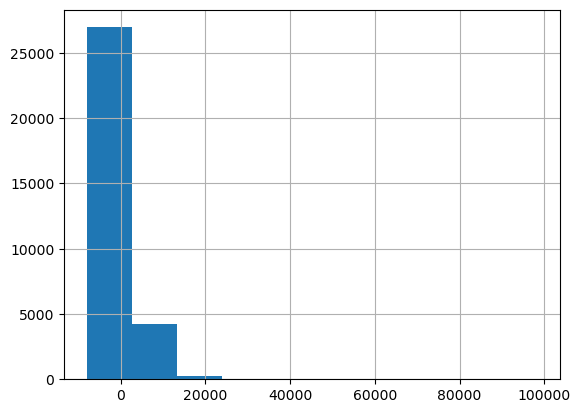

In [30]:
df['accountBalance'].hist()

The dataset is clean with seemingly no outliers. I will now do some exploratory data analysis.

In [31]:
# save the data to a new csv file
df.to_csv('cleaned_train.csv', index=False)